# Redes de mundo pequeño

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import sys
import queue
print ("- Diseñado en python 3")
print ("- No testeado para python 2")
print ("- Kernel en ejecución: \npython " + sys.version)

- Diseñado en python 3
- No testeado para python 2
- Kernel en ejecución: 
python 3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  2 2016, 17:53:06) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


## Funciones de otras practicas importadas como una librería

In [2]:
import lib_grafos as lg
file = open('funciones_lib_grafos.txt', 'r')
print(file.read())

def grafo_aleatorio(num_nodos, prob):
def tam_grafo(grafo):
def aleatorio(num_nodos, prob):
def indiceCluster_caminoCar(grafo):
def aleatiorio2(num_nodos, prob):
def calcula_C(grafo):
def calcula_L(grafo):
def calcula_grados(grafo):
def adyacentes(grafo, vertice):
def matrix_to_adyacent(grafo):
def calcula_grados_rapido(grafo, limit):
def get_distro(grados, tam_grafo):
def busqueda_anchura(grafo, nodo_ini=0):
def componentes_conexas(grafo):
def componentes_conexas_nodo(grafo, nodo, cola):
def aleatorio3(N, p):
def create_mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno (num_nodos, k, probabilidad):
def mundo_pequeno_print (num_nodos, k, probabilidad):



## Apartado A - Crear una red de mundo pequeño

In [3]:
def create_mundo_pequeno (num_nodos, k, probabilidad):
    num_vecinos=2*k
    res = np.zeros(shape = (num_nodos, num_nodos))
    for i in range(num_nodos):
        for j in range(k):
            res[i][(i+j+1)%num_nodos]=1
            res[i][(i-j-1)%num_nodos]=1
    for i in range(num_nodos):
        vecinos = lg.adyacentes(res, i)
        for vecino in vecinos:
            if vecino>i:
                if rd.random()<=probabilidad:
                    nr = rd.randrange(0, num_nodos-1)
                    count_break=0
                    posible=True
                    while res[i][nr]==1 and i==nr:
                        nr = rd.randrange(0, num_nodos-1)
                        count_break = count_break + 1
                        if count_break == num_nodos*2: 
                            posible=False #Asumimos que este nodo tiene todas las posibles ramas
                            break
                    if posible != False and len(lg.adyacentes(res,i))>1 and len(lg.adyacentes(res,vecino))>1:
                        res[i][vecino]=0
                        res[vecino][i]=0
                        res[i][nr]=1
                        res[nr][i]=1
    return res

def mundo_pequeno (num_nodos, k, probabilidad):
    res = create_mundo_pequeno (num_nodos, k, probabilidad)
    c, grafos, N = lg.calcula_C(res)
    l = lg.calcula_L(res)
    return res, c, l

def mundo_pequeno_print (num_nodos, k, probabilidad):
    res, c, l = mundo_pequeno (num_nodos, k, probabilidad)
    print("=================\nGenerado grafo:\nC = "+str(c)+"\nL = "+str(l))
    print (res)

In [4]:
mundo_pequeno_print(15, 3, .5)

Generado grafo:
C = 0.323015873016
L = 1.7142857142857142
[[ 0.  0.  1.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  1.  1.  1.]
 [ 1.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  1.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1.  1.  0.  0.  1.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  1.  0.  0.]
 [ 1.  1.  0.  0.  1.  0.  0.  1.  1.  1.  0.  1.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  1.  1.  1.  0.  0.  1.  0.]
 [ 1.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  1.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  0.  1.]
 [ 1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0

## Apartado B - Estudiar las propiedades de una red de mundo pequeño

C y L


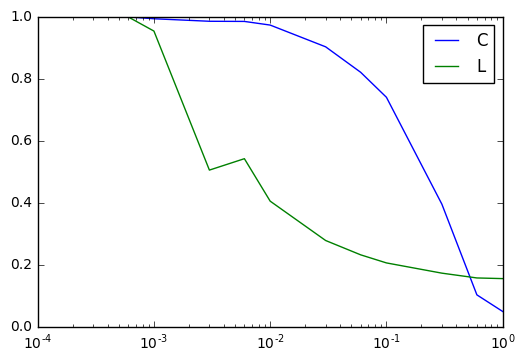

In [5]:
N=300
k=4
prob=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
cs=[]
ls=[]
for p in prob:
    res, c, l = mundo_pequeno (N, k, p)
    cs.append(c)
    ls.append(l)
cs_0=cs[0]
ls_0=ls[0]
for i in range(len(cs)):
    cs[i]=cs[i]/cs_0
for i in range(len(ls)):
    ls[i]=ls[i]/ls_0
print("==========================\nC y L")
plt.plot(prob, cs, label="C")
plt.plot(prob, ls, label="L")
plt.legend()
plt.semilogx()
plt.show()

0
0.0001
0.0003
0.0006
0.001
0.003
0.006
0.01
0.03
0.06
0.1
0.3
0.6
1.0
C y L


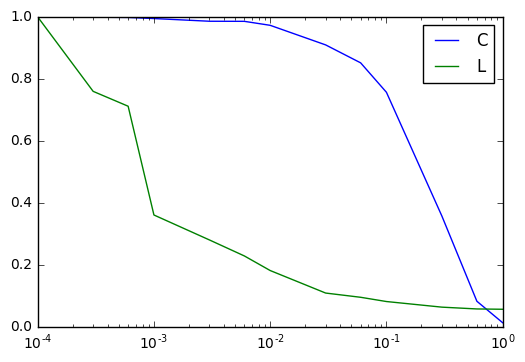

In [8]:
N=1000
k=4
prob=[0,0.0001,0.0003,0.0006,0.001,0.003,0.006,0.01,0.03,0.06,0.1,0.3,0.6,1.]
cs=[]
ls=[]
for p in prob:
    print(p)
    res, c, l = mundo_pequeno (N, k, p)
    cs.append(c)
    ls.append(l)
cs_0=cs[0]
ls_0=ls[0]
for i in range(len(cs)):
    cs[i]=cs[i]/cs_0
for i in range(len(ls)):
    ls[i]=ls[i]/ls_0
print("==========================\nC y L")
plt.plot(prob, cs, label="C")
plt.plot(prob, ls, label="L")
plt.legend()
plt.semilogx()
plt.show()

### ¿Para qué probabilidades p se producen cambios fase en el comportamiento los parámetros L y C?
En L (con N=300) se obtiene un valor algo inferior a p~0.1%

En L (con N=1000) es un valor muy pequeño que no se observa

En C con p=10%

### ¿Corresponde el valor de p observado con el valor de p teórico para el cambio de fase en el comportamiento del camino característico?

Si tomamos N=300
El cambio de fase es teóricamente p=1/kN, siendo en este caso p=1/4*300=0,083% lo que se corresponde aproximadamente con el valor observado(p=0.1%)

Si aumentamos N la probabilidad de cambio disminuye hasta casi no ser observable en la gráfica


### Comparar las gráficas obtenidas de C y L con las correspondientes gráficas teóricas.
Como se puede observar los resultados son similares
![title](teoria_small_word.png)
![title](obtenido_small_word.png)